In [1]:
import pandas as pd 
import numpy as np

In [1]:
import os
import pandas as pd
from datetime import datetime

# Define the path to the folder containing the CSV files
path = 'D:/Shantanu/NYU CUSP/Data Viz/Final project/KETI/'

# Define the list of required room folders
room_folders = ['413', '415', '417', '419','421','422','423','424','442','446','448','452','454','456','458','462']

# Create an empty list to store the dataframes
dfs = []

# Loop through each required room folder and read the CSV files
for room_folder in room_folders:
    room_path = os.path.join(path, room_folder)
    if os.path.isdir(room_path):
        for csv_file in os.listdir(room_path):
            if csv_file.endswith('.csv'):
                csv_path = os.path.join(room_path, csv_file)
                sensor_type = os.path.splitext(csv_file)[0] 
                df = pd.read_csv(csv_path, header=None, names=['timestamp', sensor_type])
                df['room'] = room_folder
                df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
                df['hour'] = df['timestamp'].dt.hour
                df['date'] = df['timestamp'].dt.date
                dfs.append(df)

# Combine all dataframes into a single dataframe
df_combined = pd.concat(dfs, ignore_index=True)

# Groupby with date, hour, and room columns and calculate the mean values
df_mean = df_combined.groupby(['date', 'hour', 'room'], as_index = False).mean()

# Print the resulting dataframe
print(df_mean.head())


         date  hour room         co2   humidity      light  pir  temperature
0  2013-08-23    16  415  486.203271        NaN        NaN  NaN          NaN
1  2013-08-23    17  415  492.864789        NaN        NaN  NaN          NaN
2  2013-08-23    22  424         NaN        NaN        NaN  0.0          NaN
3  2013-08-23    23  413  528.236722  45.150974  93.707763  0.0    24.116347
4  2013-08-23    23  415  532.727549  51.742340  68.896657  0.0    23.407280


In [2]:
df_mean = df_mean.round(2)
df_mean

,date,hour,room,co2,humidity,light,pir,temperature
0,2013-08-23,16,415,486.20,NaN,NaN,NaN,NaN
1,2013-08-23,17,415,492.86,NaN,NaN,NaN,NaN
2,2013-08-23,22,424,NaN,NaN,NaN,0.0,NaN
3,2013-08-23,23,413,528.24,45.15,93.71,0.0,24.12
4,2013-08-23,23,415,532.73,51.74,68.90,0.0,23.41
...,...,...,...,...,...,...,...,...
3198,2013-09-01,6,452,NaN,52.32,2.38,0.0,22.65
3199,2013-09-01,6,454,NaN,NaN,NaN,0.0,NaN
3200,2013-09-01,6,456,NaN,NaN,NaN,0.0,NaN
3201,2013-09-01,6,458,NaN,NaN,NaN,0.0,NaN


In [3]:
df_mean.shape

(3203, 8)

In [4]:
start_date = pd.to_datetime("2013-08-24")
end_date = pd.to_datetime("2013-08-30")
df_filtered = df_mean[(df_mean["date"] >= start_date) & (df_mean["date"] <= end_date)]
df_filtered.shape

C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


(2688, 8)

In [5]:
df_filtered.reset_index(drop=True, inplace=True)

df_filtered

,date,hour,room,co2,humidity,light,pir,temperature
0,2013-08-24,0,413,527.41,44.40,133.43,0.00,24.59
1,2013-08-24,0,415,539.77,51.52,75.10,0.00,23.59
2,2013-08-24,0,417,408.33,51.29,58.86,0.00,23.73
3,2013-08-24,0,419,557.42,52.26,145.33,16.83,73.18
4,2013-08-24,0,421,400.58,52.86,187.18,0.00,23.13
...,...,...,...,...,...,...,...,...
2683,2013-08-30,23,452,429.71,53.31,3.41,0.00,23.02
2684,2013-08-30,23,454,403.86,60.37,3.56,0.00,22.96
2685,2013-08-30,23,456,495.64,56.99,3.93,0.00,23.74
2686,2013-08-30,23,458,544.42,60.45,4.12,0.00,22.81


In [15]:
df_filtered.to_csv('Filtered_data.csv',index = False)

In [27]:
df_filtered.to_excel('Filtered_data.xlsx',index = False)

In [16]:
df = pd.read_csv('Filtered_data.csv')
df

,date,hour,room,co2,humidity,light,pir,temperature
0,2013-08-24,0,413,527.41,44.40,133.43,0.00,24.59
1,2013-08-24,0,415,539.77,51.52,75.10,0.00,23.59
2,2013-08-24,0,417,408.33,51.29,58.86,0.00,23.73
3,2013-08-24,0,419,557.42,52.26,145.33,16.83,73.18
4,2013-08-24,0,421,400.58,52.86,187.18,0.00,23.13
...,...,...,...,...,...,...,...,...
2683,2013-08-30,23,452,429.71,53.31,3.41,0.00,23.02
2684,2013-08-30,23,454,403.86,60.37,3.56,0.00,22.96
2685,2013-08-30,23,456,495.64,56.99,3.93,0.00,23.74
2686,2013-08-30,23,458,544.42,60.45,4.12,0.00,22.81


In [23]:
df.dtypes

date            object
hour             int64
room             int64
co2            float64
humidity       float64
light          float64
pir            float64
temperature    float64
dtype: object

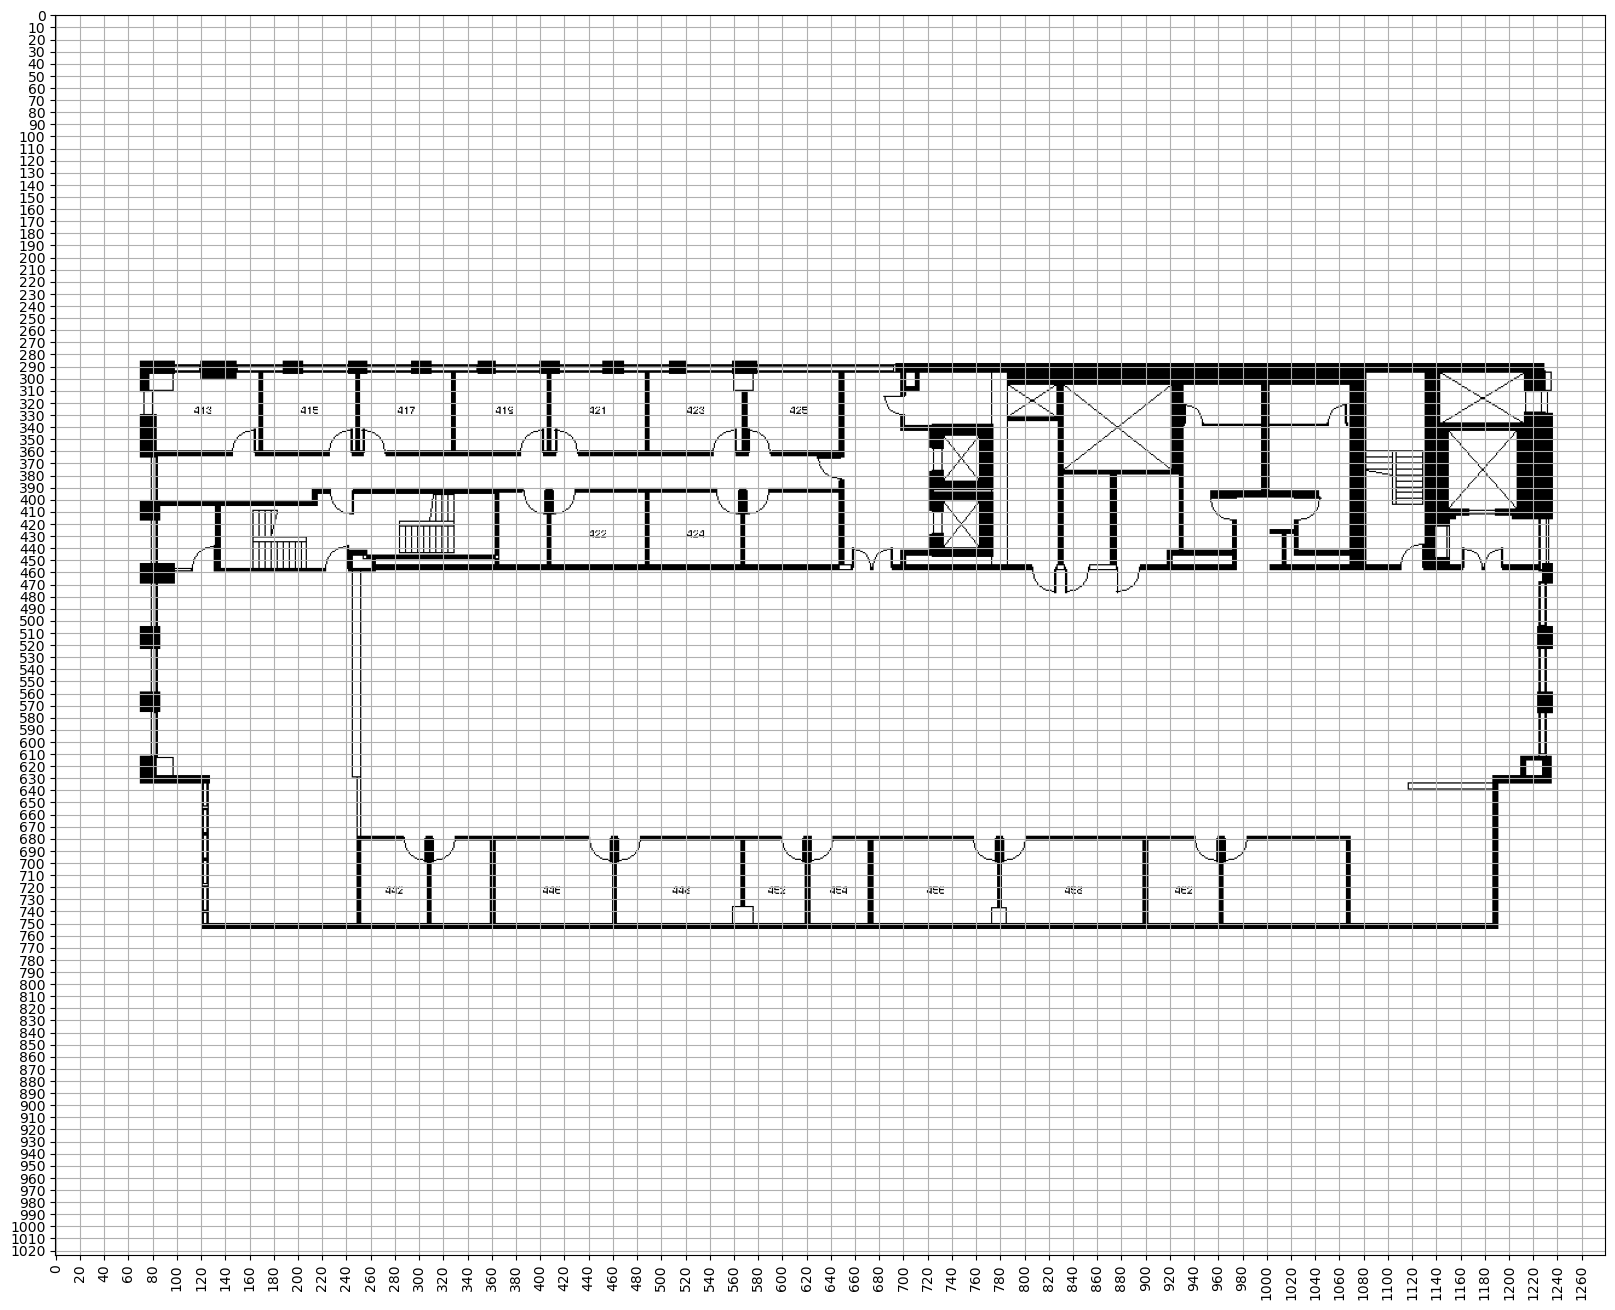

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = plt.imread('Plan.png')

# Get the dimensions of the image
height, width, channels = image.shape

# Create the mesh grid
x, y = np.meshgrid(np.arange(0, width), np.arange(0, height))

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(image)
# Add the mesh grid with ticks
plt.xticks(np.arange(0, width, 20),rotation=90)
plt.yticks(np.arange(0, height, 10))
plt.grid()

# Show the plot
plt.show()


In [25]:
df_shapes = pd.read_csv('shapes.csv')
df_shapes

,shapeId,shapeType,shapeLabel,pointId,pointX,pointY,source
0,0,polygon,413,0,78,729,NaN
1,0,polygon,413,1,170,730,NaN
2,0,polygon,413,2,171,665,NaN
3,0,polygon,413,3,76,665,NaN
4,1,polygon,415,0,252,731,NaN
...,...,...,...,...,...,...,...
59,14,polygon,458,3,780,347,NaN
60,15,polygon,462,0,962,348,NaN
61,15,polygon,462,1,962,269,NaN
62,15,polygon,462,2,903,268,NaN
